In [24]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np

In [4]:
api = comet_ml.api.API(api_key='z4s7SHtPPZqFaWHM7JWMD9zqS')

In [6]:
exp = api.get_experiment('', 'harmon-moyer', '7133a633b36f4c6ba08c551f04e65f9c')

In [36]:
def get_metric(name, target_type=float):
    return [target_type(x['metricValue']) for x in exp.get_metrics(name)]

In [35]:
def get_param(name, target_type=float):
    return target_type(exp.get_parameters_summary()[name]['valueCurrent'])

In [41]:
param_dict = {x['name']: x['valueCurrent'] for x in exp.get_parameters_summary()}

In [21]:
train_loss_recon = get_metric('train_loss_recon')
train_loss_adv = get_metric('train_loss_adv_g')

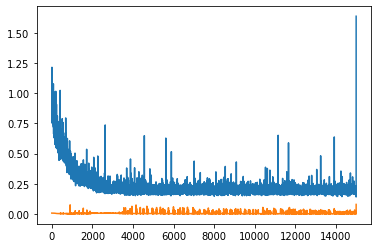

In [22]:
plt.figure()
plt.plot(train_loss_recon)
plt.plot(train_loss_adv)
plt.show()

In [26]:
mean_loss_recon = np.mean(train_loss_recon)
mean_loss_adv = np.mean(train_loss_adv)

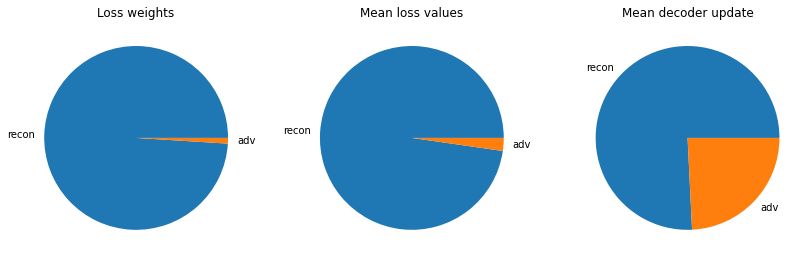

In [53]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.title('Loss weights')
plt.pie([float(param_dict['loss_weight_recon']), float(param_dict['loss_weight_adv_g'])], labels=['recon', 'adv'])


plt.subplot(1, 3, 2)
plt.title('Mean loss values')
plt.pie([mean_loss_recon, mean_loss_adv], labels=['recon', 'adv'])

plt.subplot(1, 3, 3)
plt.title('Mean decoder update')
plt.pie([
    np.mean(get_metric('dlrecon_dwdec')),
    np.mean(get_metric('dladv_dwdec'))
], labels=['recon', 'adv'])

plt.show()